In [59]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely import LineString, Point
from shapely.geometry import box
import datetime

In [60]:

gdf = gpd.read_file("boylston.geojson")
if gdf.crs.is_geographic:
    gdf = gdf.to_crs(epsg=3857)

line = gdf.geometry.iloc[0]
total_length = line.length

cmx_df = pd.read_csv("cm_final.csv")

step_lengths = cmx_df["cmx"].values / 100.0
cmy = cmx_df["cmy"]
id = cmx_df["id"]

cmx_with_start = np.insert(step_lengths * 100, 0, 0)

cumulative_dists = np.insert(np.cumsum(step_lengths), 0, 0.0)

points = [line.interpolate(dist) for dist in cumulative_dists]
print(points)

points_gdf = gpd.GeoDataFrame(geometry=points, crs=gdf.crs)
print(points_gdf)
points_gdf["cmx"] = cmx_with_start
points_gdf["cmy"] = cmy
points_gdf["id"] = id

points_gdf.to_file("points-spaced-by-cmx_20250729.geojson", driver="GeoJSON")


[<POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-7.91e+06 5.21e+06)>, <POINT (-

                                               geometry  \
0     POLYGON ((-7910653.405 5213910.112, -7910653.4...   
1     POLYGON ((-7910653.480 5213910.093, -7910653.4...   
2     POLYGON ((-7910653.569 5213910.063, -7910653.5...   
3     POLYGON ((-7910653.658 5213910.042, -7910653.6...   
4     POLYGON ((-7910653.748 5213909.942, -7910653.7...   
...                                                 ...   
9285  POLYGON ((-7915970.261 5211879.320, -7915970.2...   
9286  POLYGON ((-7915970.097 5211876.576, -7915970.0...   
9287  POLYGON ((-7915970.025 5211873.489, -7915970.0...   
9288  POLYGON ((-7915969.793 5211870.373, -7915969.7...   
9289  POLYGON ((-7915969.896 5211865.915, -7915969.8...   

                          id  
0     commonwealth:3f463217b  
1     commonwealth:xg94j223v  
2     commonwealth:f4757j204  
3     commonwealth:794083254  
4     commonwealth:q524n340p  
...                      ...  
9285  commonwealth:7h149z20r  
9286  commonwealth:kk91fr14z  
9287  common

<Axes: >

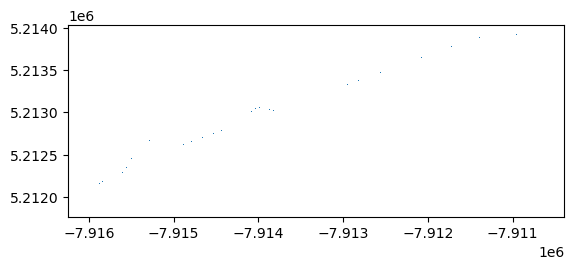

In [61]:
step_lengths_y = cmx_df["cmy"].values / 100.0

combined = np.column_stack((step_lengths, step_lengths_y))

bbox_geoms = []

for point, (dx, dy) in zip(points_gdf.geometry, combined):
    minx = point.x - dx / 2
    maxx = point.x + dx / 2
    miny = point.y - dy / 2
    maxy = point.y + dy / 2
    bbox = box(minx, miny, maxx, maxy)
    bbox_geoms.append(bbox)

bbox_gdf = gpd.GeoDataFrame(geometry=bbox_geoms, crs=gdf.crs)

bbox_gdf['id'] = id
print(bbox_gdf)
bbox_gdf.to_file("bboxes_20250729.geojson", driver="GeoJSON")
bbox_gdf.plot()